In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data_25/Round3/prices_round_3_day_1.csv", sep=';')
print(df.head())

   day  timestamp                     product  bid_price_1  bid_volume_1  \
0    1          0               VOLCANIC_ROCK      10515.0         143.0   
1    1          0              PICNIC_BASKET1      58705.0          12.0   
2    1          0              PICNIC_BASKET2      30252.0          12.0   
3    1          0  VOLCANIC_ROCK_VOUCHER_9500       1015.0          12.0   
4    1          0  VOLCANIC_ROCK_VOUCHER_9750        766.0          12.0   

   bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0      10514.0          57.0          NaN           NaN        10517   
1      58704.0          27.0          NaN           NaN        58716   
2      30251.0          27.0          NaN           NaN        30258   
3          NaN           NaN          NaN           NaN         1017   
4          NaN           NaN          NaN           NaN          767   

   ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0           200          NaN         

In [3]:
df_V = df.query("product == 'VOLCANIC_ROCK'")
df_9500 = df.query("product == 'VOLCANIC_ROCK_VOUCHER_9500'")
df_9750 = df.query("product == 'VOLCANIC_ROCK_VOUCHER_9750'")
df_10000= df.query("product == 'VOLCANIC_ROCK_VOUCHER_10000'")
df_10250= df.query("product == 'VOLCANIC_ROCK_VOUCHER_10250'")
df_10500= df.query("product == 'VOLCANIC_ROCK_VOUCHER_10500'")
print(df_10500.head())

    day  timestamp                      product  bid_price_1  bid_volume_1  \
8     1          0  VOLCANIC_ROCK_VOUCHER_10500         95.0          12.0   
21    1        100  VOLCANIC_ROCK_VOUCHER_10500         94.0          13.0   
34    1        200  VOLCANIC_ROCK_VOUCHER_10500         94.0          16.0   
44    1        300  VOLCANIC_ROCK_VOUCHER_10500         95.0          14.0   
59    1        400  VOLCANIC_ROCK_VOUCHER_10500         97.0          18.0   

    bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
8           NaN           NaN          NaN           NaN           96   
21          NaN           NaN          NaN           NaN           95   
34          NaN           NaN          NaN           NaN           95   
44          NaN           NaN          NaN           NaN           96   
59          NaN           NaN          NaN           NaN           98   

    ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
8             12  

In [4]:
S = df_V["mid_price"].to_numpy()
T = np.linspace(5, 5.9999, 10000)
T = T[::-1]
print(len(T))

10000


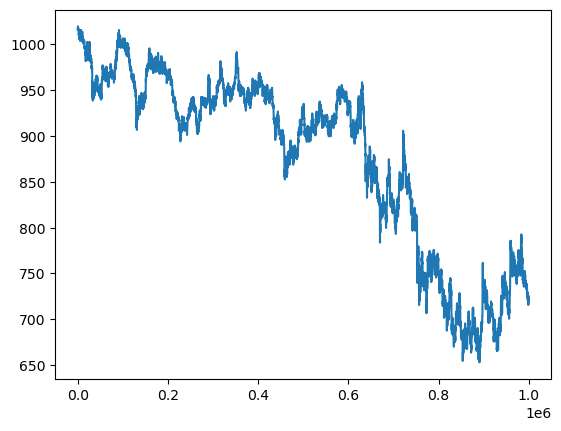

In [5]:
plt.plot(df_V["timestamp"], df_9500["mid_price"])

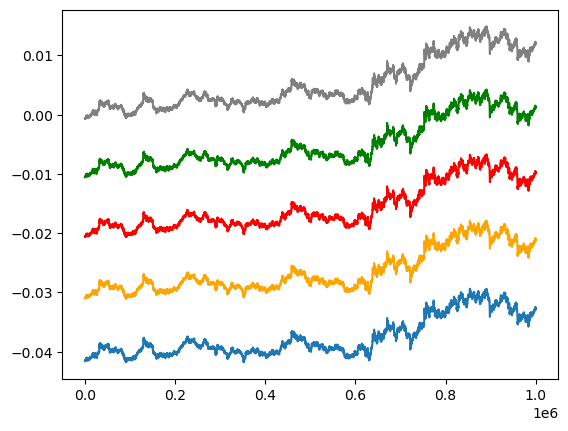

In [6]:
m_t_9500 = np.log(9500 / S) / np.sqrt(T)
m_t_9750 = np.log(9750 / S) / np.sqrt(T)
m_t_10000 = np.log(10000 / S) / np.sqrt(T)
m_t_10250 = np.log(10250 / S) / np.sqrt(T)
m_t_10500 = np.log(10500 / S) / np.sqrt(T)
plt.plot(df_V["timestamp"], m_t_9500)
plt.plot(df_V["timestamp"], m_t_9750, color='orange')
plt.plot(df_V["timestamp"], m_t_10000, color='red')
plt.plot(df_V["timestamp"], m_t_10250, color='green')
plt.plot(df_V["timestamp"], m_t_10500, color='gray')

In [7]:
from scipy.stats import norm

def black_scholes_call(S, K, T, sigma):
    d1 = (np.log(S / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * norm.cdf(d2)

def vega(S, K, T, sigma):
    d1 = (np.log(S / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def implied_vol_array(C_mkt, S, T, K, sigma_init=0.2, tol=1e-8, max_iter=10000):
    C_mkt = np.asarray(C_mkt)
    S = np.asarray(S)
    T = np.asarray(T)
    sigma = np.full_like(C_mkt, sigma_init, dtype=float)

    for _ in range(max_iter):
        price = black_scholes_call(S, K, T, sigma)
        v = vega(S, K, T, sigma)
        diff = price - C_mkt

        # Newton-Raphson Schritt
        sigma -= diff / v

        # Abbruchbedingung
        if np.all(np.abs(diff) < tol):
            break

    return sigma




In [8]:
v_t_9500 = implied_vol_array(df_9500["mid_price"].to_numpy(), S, T, 9500)
v_t_9750 = implied_vol_array(df_9750["mid_price"].to_numpy(), S, T, 9750)
v_t_10000 = implied_vol_array(df_10000["mid_price"].to_numpy(), S, T, 10000)
v_t_10250 = implied_vol_array(df_10250["mid_price"].to_numpy(), S, T, 10250)
v_t_10500 = implied_vol_array(df_10500["mid_price"].to_numpy(), S, T, 10500)

/tmp/ipykernel_5342/1079821332.py:24: RuntimeWarning: divide by zero encountered in divide
  sigma -= diff / v
/tmp/ipykernel_5342/1079821332.py:4: RuntimeWarning: overflow encountered in square
  d1 = (np.log(S / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_5342/1079821332.py:4: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_5342/1079821332.py:9: RuntimeWarning: overflow encountered in square
  d1 = (np.log(S / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_5342/1079821332.py:9: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_5342/1079821332.py:24: RuntimeWarning: invalid value encountered in divide
  sigma -= diff / v
/tmp/ipykernel_5342/1079821332.py:24: RuntimeWarning: overflow encountered in divide
  sigma -= diff / v


In [9]:
print(v_t_9500)

[       nan 0.01571491 0.01571504 ... 0.01288887 0.00446323 0.01286628]


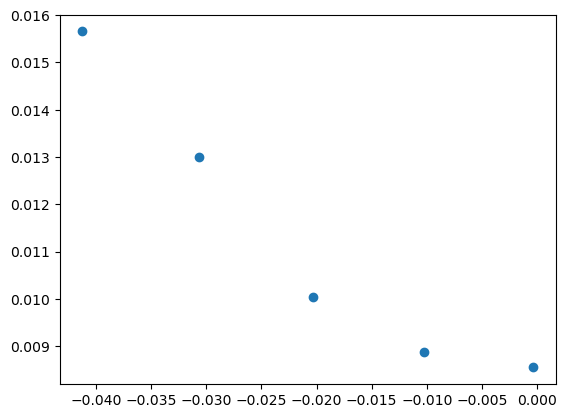

In [10]:
i=96
x = [m_t_9500[i], m_t_9750[i], m_t_10000[i], m_t_10250[i], m_t_10500[i]]
y = [v_t_9500[i], v_t_9750[i], v_t_10000[i], v_t_10250[i], v_t_10500[i]]
plt.scatter(x, y)

In [11]:
print(v_t_10000[95])

0.010028929768732561



Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.

Intel MKL ERROR: Parameter 6 was incorr

(0.007, 0.012)

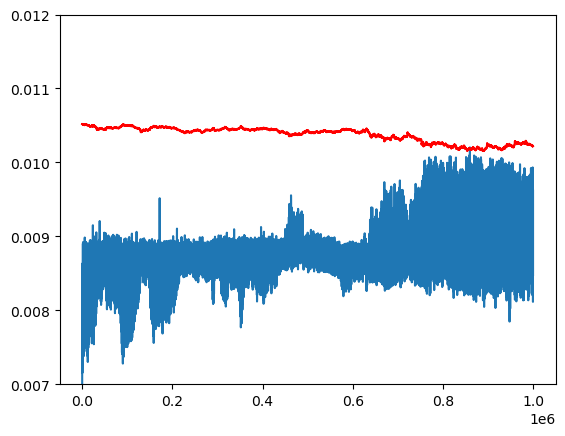

In [18]:
base_vol = np.zeros(len(v_t_9500))
for i in range(len(v_t_9500)):
    try:
        x = [m_t_9500[i], m_t_9750[i], m_t_10000[i], m_t_10250[i], m_t_10500[i]]
        y = [v_t_9500[i], v_t_9750[i], v_t_10000[i], v_t_10250[i], v_t_10500[i]]
        base_vol[i] = np.polyfit(x,y,2)[2]
    except:
        base_vol[i] = base_vol[i-1]
        continue
    
plt.plot(df_V["timestamp"], base_vol)
plt.plot(df_V["timestamp"], S/1000000, color='r')
# plt.xlim(150000,200000)
plt.ylim(0.007, 0.012)

array([ 9.50977130e-05,  0.00000000e+00, -1.90186383e-04, ...,
        3.42340143e-04, -1.46731555e-04,  2.93484643e-04])

In [ ]:
# Calculate the daily realized volatility over last n timesteps
def real_vol(S, n):
    r = np.log(S[:-1]/S[1:])
    